In [8]:
import bt
import pandas as pd
import seaborn as sns
import datetime

In [9]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


## Downloading Historical data
First let's download some historical data from Poloniex. With this API you can only fetch one year at a time.

In [77]:
end = datetime.datetime.now()
start = end - datetime.timedelta(days=364)
print('Downloading data from {} to {}'.format(start,end))
pairs = ['USDT_BTC','USDT_ETH', 'USDT_LTC']
rates = []
for pair in pairs: 
    df = pd.read_json('https://poloniex.com/public?command=returnTradeHistory&currencyPair={}&start={}&end={}'.format(pair, int(start.timestamp()), int(end.timestamp())))
    df.set_index(['date'], inplace=True)
    df = df.resample('1T').mean() #resample in windows of 3 minutes
    df[pair] = df.rate
    del df['rate']
    rates.append(df)
    
data = pd.concat(rates, axis=1)
data = data[pairs]

In [78]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 5728 entries, 2017-07-04 22:21:00 to 2017-07-08 21:48:00
Freq: T
Data columns (total 3 columns):
USDT_BTC    2736 non-null float64
USDT_ETH    4490 non-null float64
USDT_LTC    5121 non-null float64
dtypes: float64(3)
memory usage: 179.0 KB


In [79]:
#data.set_index(['date'], inplace=True)
data.tail()

,USDT_BTC,USDT_ETH,USDT_LTC
date,,,
2017-07-08 21:44:00,2529.526329,242.350000,49.864552
2017-07-08 21:45:00,2529.957148,242.335756,NaN
2017-07-08 21:46:00,2531.181622,242.357268,49.807733
2017-07-08 21:47:00,2531.080616,242.560561,49.852139
2017-07-08 21:48:00,2531.080616,242.838652,NaN


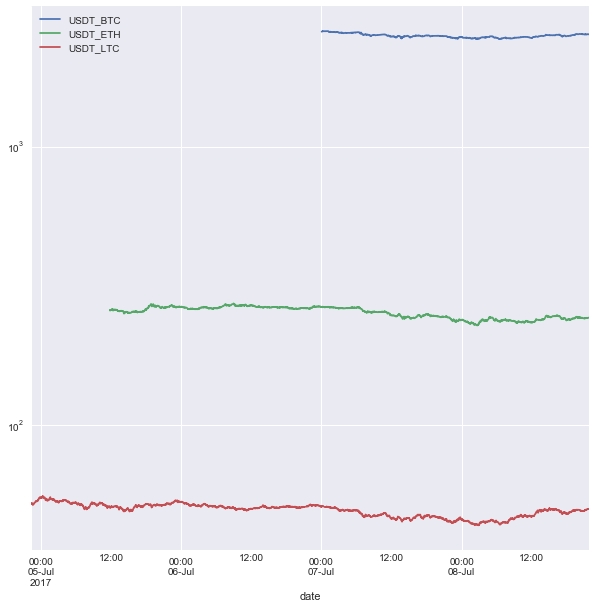

In [80]:
data.plot(figsize=(10,10), logy=True);

In [50]:
# create the strategy
s = bt.Strategy('s1', [bt.algos.RunWeekly(),
                       bt.algos.SelectAll(),
                       bt.algos.WeighEqually(),
                       bt.algos.Rebalance()])


In [52]:
# create a backtest and run it
test = bt.Backtest(s, data)
res = bt.run(test)


s1
0% [##############################] 100% | ETA: 00:00:00

/usr/local/lib/python3.5/dist-packages/ffn/core.py:1183: RuntimeWarning: invalid value encountered in double_scalars
  res = er.mean() / er.std()
/usr/local/lib/python3.5/dist-packages/ffn/core.py:209: RuntimeWarning: invalid value encountered in double_scalars
  self.calmar = self.cagr / abs(self.max_drawdown)


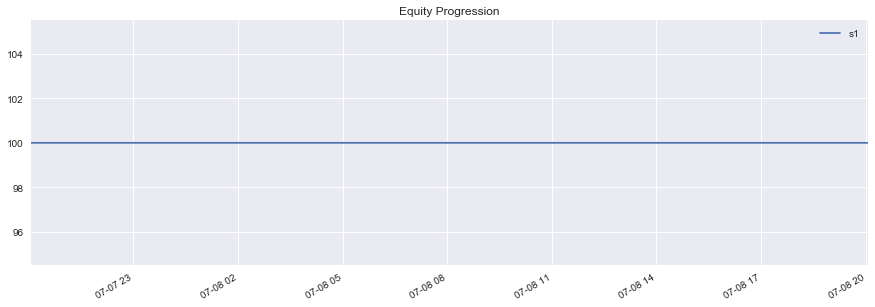

In [53]:
res.plot()


In [54]:
res.display()

Stat                 s1
-------------------  ----------
Start                2017-07-07
End                  2017-07-07
Risk-free rate       0.00%

Total Return         0.00%
Daily Sharpe         -
Daily Sortino        -
CAGR                 0.00%
Max Drawdown         0.00%
Calmar Ratio         -

MTD                  -
3m                   -
6m                   -
YTD                  0.00%
1Y                   -
3Y (ann.)            -
5Y (ann.)            -
10Y (ann.)           -
Since Incep. (ann.)  0.00%

Daily Sharpe         -
Daily Sortino        -
Daily Mean (ann.)    0.00%
Daily Vol (ann.)     0.00%
Daily Skew           0.00
Daily Kurt           -
Best Day             0.00%
Worst Day            0.00%

Monthly Sharpe       -
Monthly Sortino      -
Monthly Mean (ann.)  -
Monthly Vol (ann.)   -
Monthly Skew         -
Monthly Kurt         -
Best Month           -
Worst Month          -

Yearly Sharpe        -
Yearly Sortino       -
Yearly Mean          -
Yearly Vol           -
Year